In [ ]:
import numpy as np
import sympy as sp
from sympy import S, Symbol, symbols, solveset, integrate, Integral, diff, intersection, Interval, plot_parametric, plot_implicit, And, E, latex, plot, Eq

import matplotlib.pyplot as plt

from IPython.display import display, Latex

## Занятие 12
## Математический анализ
## Применение интегралов для вычисления объема тела вращения
### Задание 1
Вычислить объем тела вращения около оси ОX фигуры, ограниченной графиком $y = \sin x$, $0 \le x \le \pi$ и осью ОХ. Построить график с помощью plot из sympy, названием графика (title) сделать формулу для вычисления объема по образцу Примера 1, например
$$
\pi\int\limits_0^1 (x - x^2)^2\,dx = \frac{\pi}{30},
$$
только формула должна соответствовать Заданию 1. Использовать latex, mode='inline'.

<IPython.core.display.Latex object>

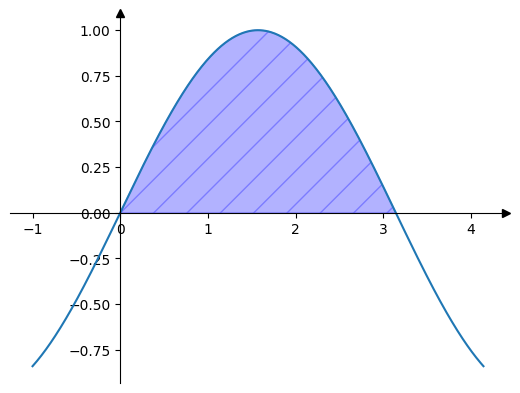

In [ ]:
x = Symbol('x', positive=True)

def y(x, lib='sp'):
    if lib == 'np':
        return np.sin(x)
    return sp.sin(x)

fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

V_OX = sp.pi * Integral(y(x) ** 2, (x, 0, sp.pi))
X = np.linspace(-1, np.pi + 1, 500)
ax.plot(X, y(X, 'np'))

X_ = np.linspace(0, np.pi, 400)
y_ = sp.lambdify(x, y(x))
ax.fill_between(X_, y_(X_), 0, color="blue", alpha=0.3, hatch='/')

I = sp.pi * integrate(y(x) ** 2, (x, 0, sp.pi))
display(Latex(fr'$${latex(V_OX)} = {latex(I)}$$'))


### Задание 2.
Вычислить объем тела, получающегося вращением вокруг ОХ астроиды
$$
\left\{
\begin{matrix}
x = \cos^3 t\\
y = \sin^3 t
\end{matrix}
\right.
$$

###### Указание.
Пределы интегрирования $\pi, 0$, поскольку $\cos^3 t$ убывает на $[0, \pi]$.

In [ ]:
t = Symbol('t', positive=True)
def phi(t):
    return sp.cos(t) ** 3
def phi(t):
    return sp.sin(t) ** 3


V_OX = sp.pi * Integral(phi(t) * phi(t).diff(t), (t, 0, sp.pi))
I = sp.pi * integrate(phi(t) * phi(t).diff(t), (t, 0, sp.pi))
display(Latex(fr'$${latex(V_OX)} = {latex(I)}$$'))

<IPython.core.display.Latex object>

### Задание 3.
Найти объем тела, которое получается вращением кривой $r = a\cos^2\phi$, $0 \le \phi \le \pi$, вокруг полярной оси.
Построить график при $a = 1$ в полярной системе координат, воспользоваться функцией polar из matplotlib.pyplot.

<IPython.core.display.Latex object>

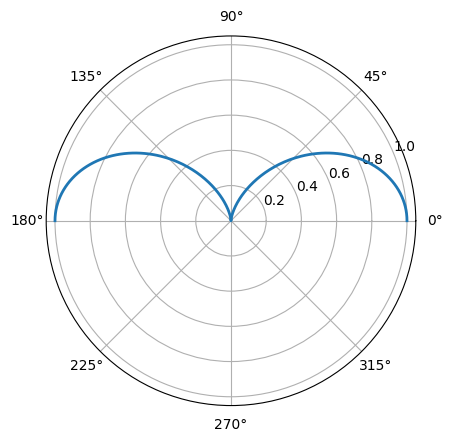

In [ ]:
phi = Symbol('phi', positive=True)
def r(phi, a, lib='sp'):
    if lib == 'np':
        return a * np.cos(phi) ** 2
    return a * sp.cos(phi) ** 2

Phi = np.linspace(0, np.pi, 314)
plt.polar(Phi, r(Phi, 1, 'np'), lw=2)

V_OX = sp.pi * Integral(r(phi, 1) * sp.sin(phi), (phi, 0, sp.pi))
I = sp.pi * integrate(r(phi, 1) * sp.sin(phi), (phi, 0, sp.pi))
display(Latex(fr'$${latex(V_OX)} = {latex(I)}$$'))

### Задание 4.
Вычислить объем тела, образованного вращением около оси ОY фигуры, ограниченной параболой $y^2 = 2px$, прямой $x=\frac{p}{2}$, $p > 0$ - параметр и осью ОY. Изобразить вращаемую фигуру с помощью plot_implicit.

###### Указание.
Вращаемая фигура симметрична относительно оси OX, поэтому можно вычислить объем фигуры, получающейся вращением верхней ветви параболы, а затем этот объем удвоить.

$$
V_{OY} = 2\pi\int\limits_a^b xf(x)\,dx
$$

<IPython.core.display.Latex object>

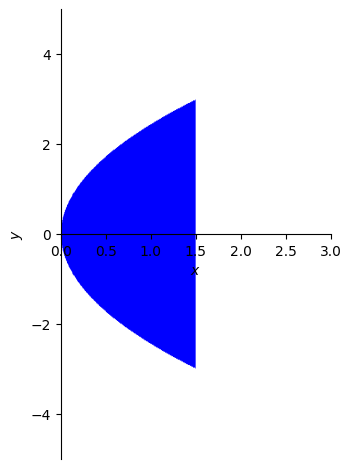

<IPython.core.display.Latex object>

In [ ]:
x, y = symbols('x y')
p = Symbol('p', positive=True)

p_ = 3
display(Latex(fr"$p = 3$"))
plot_implicit(sp.And(y ** 2 < 2 * p_ * x, x < p_ / 2), (x, 0, 3), (y, -5, 5), aspect_ratio=(2, 1))
I = 2 * sp.pi * Integral(p / 2 * sp.sqrt(2 * p * x), (x, 0, p / 2))
V_OY = 2 * I.doit()
display(Latex(fr"$$V_{{OY}} = 2 \left( {latex(I)} \right) = {latex(V_OY)}$$"))

### Задание 5.
Вычислить объем тела, образованного вращением около оси ОY фигуры, ограниченной $y = e^x$, прямой $y=e$, и прямой $y = e^2$.

$$
V_{OY}=\pi\int\limits_c^d x^2(y)\,dy
$$

<IPython.core.display.Latex object>

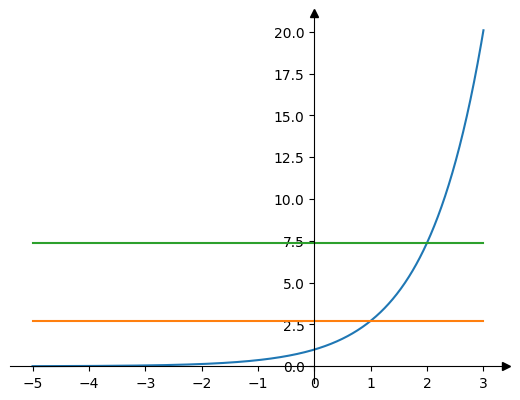

In [ ]:
def y_1(x, lib="sp"):
    if lib == "np":
        return np.exp(x)
    return sp.exp(x)


def y_2(lib="sp"):
    if lib == "np":
        return np.e
    return S.Exp1


def y_3(lib="sp"):
    if lib == "np":
        return np.e ** 2
    return  S.Exp1 ** 2


fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

X = np.linspace(-5, 3, 1000)

ax.plot(X, y_1(X, "np"))
ax.plot(X, [y_2("np") for i in range(len(X))])
ax.plot(X, [y_3("np") for i in range(len(X))])

# X_fill = np.linspace(0, 2, 200)
# ax.fill_between(X_fill, y_1(X_fill, "np"), [y_2("np") for i in range(len(X_fill))],  [y_3("np") for i in range(len(X_fill))], hatch="/", color="blue", alpha=0.3)

I = sp.pi * Integral(sp.log(y), (y, y_2("sp"), y_3("sp")))
V_OY = I.doit()
display(Latex(fr"$$V_{{OY}} = {latex(I)} = {latex(V_OY)}$$"))

### Индивидуальное задание
Вычислить объем тела, образованного при вращении области между графиками функций
$f_1(x)$ и  $f_2(x)$.

Вариант 98

$$f(x)=4 \cos{\left(x \right)}$$
$$g(x)=6 \cos{\left(x \right)}$$

$$
V_{OY} = 2\pi\int\limits_a^b xf(x)\,dx
$$

<IPython.core.display.Latex object>

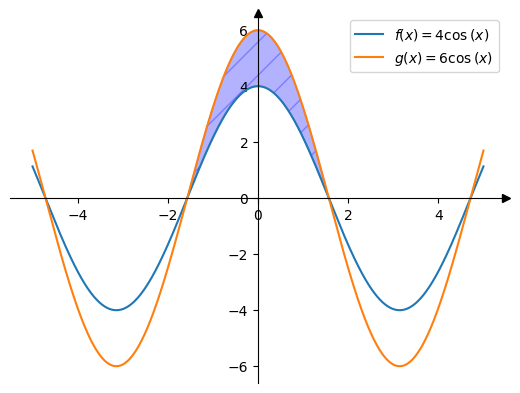

In [ ]:
def f(x, lib='sp'):
    if lib == 'np':
        return 4 * np.cos(x)
    return 4 * sp.cos(x)


def g(x, lib='sp'):
    if lib == 'np':
        return 6 * np.cos(x)
    return 6 * sp.cos(x)


fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

X = np.linspace(-5, 5, 1000)
ax.plot(X, f(X, 'np'), label=fr"$f(x) = {latex(f(x))}$")
ax.plot(X, g(X, 'np'), label=fr"$g(x) = {latex(g(x))}$")

X_fill = np.linspace(-np.pi / 2, np.pi / 2, 628)
ax.fill_between(X_fill, f(X_fill, "np"), g(X_fill, "np"), hatch="/", color="blue", alpha=0.3)

ax.legend()


# Solving a trivial equation f(x) - g(x) = 0, we can notice that the first intersection with the OX is at the point where cos(x) = 0,  i.e. at x = pi / 2. Also, the answer shows the plotted graph below.
a = -sp.pi / 2
b =  sp.pi / 2

I_g = Integral(sp.pi * g(x) ** 2, (x, -sp.pi / 2, sp.pi / 2))
I_f = Integral(sp.pi * f(x) ** 2, (x, -sp.pi / 2, sp.pi / 2))

V_OY_gf = I_g.doit() - I_f.doit()

display(Latex(fr"$$V_{{OY}} = {latex(I_g)} - {latex(I_f)} = {latex(V_OY_gf)}$$"))